In [8]:
import pandas as pd

df = pd.read_csv("github_unity_repositories_with_comments.csv")

In [9]:
print("Veri Seti Boyutu:", df.shape)
print("\nSütunlar:")
print(df.columns)

Veri Seti Boyutu: (773, 5)

Sütunlar:
Index(['Name', 'Description', 'Stars', 'URL', 'Comment'], dtype='object')


In [10]:
print("\nİlk 5 Satır:")
print(df.head())


İlk 5 Satır:
                     Name                                        Description  \
0             was_changed  A Gemplugin to extend ActiveRecord's dirty obj...   
1            factory_girl                                     No description   
2  validates_existence_of  A small plugin to validate the existence of an...   
3                   panda                  Video encoding made easy with AWS   
4           attachment_fu  Treat an ActiveRecord model as a file attachme...   

   Stars                                                URL  \
0      1  https://github.com/Unity-Technologies/was_changed   
1      3  https://github.com/Unity-Technologies/factory_...   
2      2  https://github.com/Unity-Technologies/validate...   
3      2        https://github.com/Unity-Technologies/panda   
4      1  https://github.com/Unity-Technologies/attachme...   

                                  Comment  
0  Low popularity - General Unity package  
1  Low popularity - General Unity pack

In [11]:
def star_category(stars):
    if stars >= 1000:
        return "Çok Popüler"
    elif stars >= 500:
        return "Popüler"
    elif stars >= 100:
        return "Orta Popüler"
    else:
        return "Düşük Popülerlik"

# Yeni sütun ekle
df["Star_Category"] = df["Stars"].apply(star_category)

# Kategorilere göre gruplama ve özet
star_summary = df.groupby("Star_Category")["Name"].count()
print("\nYıldız Kategorilerine Göre Dağılım:")
print(star_summary)


Yıldız Kategorilerine Göre Dağılım:
Star_Category
Düşük Popülerlik    593
Orta Popüler        105
Popüler              40
Çok Popüler          35
Name: Name, dtype: int64


In [12]:
def project_category(description):
    desc = description.lower()
    if "render" in desc or "graphics" in desc:
        return "Render/Grafik Paketi"
    elif "physics" in desc:
        return "Fizik Paketi"
    elif "tools" in desc:
        return "Araç Paketi"
    elif "ai" in desc:
        return "Yapay Zeka Paketi"
    else:
        return "Genel Unity Paketi"

# Yeni kategori sütunu ekle
df["Project_Category"] = df["Description"].apply(project_category)

# Kategorilere göre gruplama ve özet
category_summary = df.groupby("Project_Category")["Name"].count()
print("\nProje Kategorilerine Göre Dağılım:")
print(category_summary)


Proje Kategorilerine Göre Dağılım:
Project_Category
Araç Paketi              21
Fizik Paketi              3
Genel Unity Paketi      677
Render/Grafik Paketi     22
Yapay Zeka Paketi        50
Name: Name, dtype: int64


In [14]:
# Her bir projeye öneri ekle
def generate_recommendation(row):
    if row["Stars"] >= 1000:
        return "AAA oyunlar için önerilir."
    elif row["Project_Category"] == "Araç Paketi" and row["Stars"] < 500:
        return "Yeni başlayanlar için önerilir."
    elif row["Project_Category"] == "Yapay Zeka Paketi":
        return "Gelişmiş oyun yapay zekası geliştirenler için önerilir."
    else:
        return "Genel kullanıma uygun."

# Öneri sütunu ekle
df["Recommendation"] = df.apply(generate_recommendation, axis=1)

print("\nÖnerilerle Birlikte Veri:")
print(df[["Name", "Stars", "Project_Category", "Recommendation"]].head())


Önerilerle Birlikte Veri:
                     Name  Stars    Project_Category          Recommendation
0             was_changed      1  Genel Unity Paketi  Genel kullanıma uygun.
1            factory_girl      3  Genel Unity Paketi  Genel kullanıma uygun.
2  validates_existence_of      2  Genel Unity Paketi  Genel kullanıma uygun.
3                   panda      2  Genel Unity Paketi  Genel kullanıma uygun.
4           attachment_fu      1  Genel Unity Paketi  Genel kullanıma uygun.


In [15]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 217.9 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 416.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 416.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 364.4 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 468.3 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 535.8 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 497.6 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 519.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 569.3 kB/


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\yusuf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\yusuf\AppData\Local\Temp\ipykernel_3764\556110789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Star_Category", order=df["Star_Category"].value_counts().index, palette="viridis")


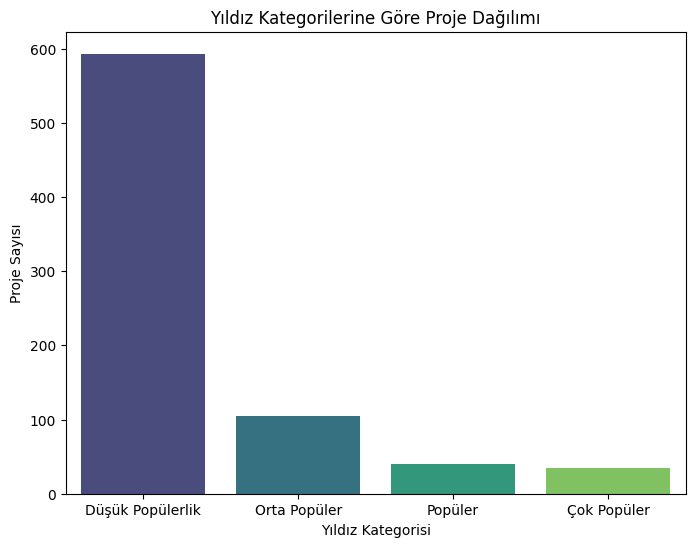

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yıldız kategorisi dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Star_Category", order=df["Star_Category"].value_counts().index, palette="viridis")
plt.title("Yıldız Kategorilerine Göre Proje Dağılımı")
plt.xlabel("Yıldız Kategorisi")
plt.ylabel("Proje Sayısı")
plt.show()

In [17]:
# Final CSV kaydetme
df.to_csv("github_unity_repositories_with_analysis.csv", index=False)
print("Sonuçlar kaydedildi: github_unity_repositories_with_analysis.csv")

Sonuçlar kaydedildi: github_unity_repositories_with_analysis.csv
